**Consumer spending data**

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import glob
import re
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import importlib
import EDA_functions as EDA_functions
importlib.reload(EDA_functions)
from EDA_functions import *

scaler_mm = MinMaxScaler()
scaler_ss = StandardScaler()

processed_path = '../../data/processed_data/'
raw_path = '../../data/raw_data/'

In [23]:
"""food_expend = pd.read_csv(raw_path+'food_expenditures.csv', skiprows=10, index_col=[0], skipfooter=20, engine='python', on_bad_lines='skip', na_values='..', thousands=',')

food_expend.drop(food_expend.index[0:2], inplace=True)

food_expend.index = food_expend.index.rename('Date')
food_expend.index = pd.to_datetime(food_expend.index, format='%Y')
food_expend = food_expend.apply(pd.to_numeric)

food_expend.columns = [remove_num(col) for col in food_expend.columns]

food_expend_i = food_expend.interpolate(method='linear', limit_direction='forward', axis=0) #interpolated 2020 and 2018

food_expend"""

"food_expend = pd.read_csv(raw_path+'food_expenditures.csv', skiprows=10, index_col=[0], skipfooter=20, engine='python', on_bad_lines='skip', na_values='..', thousands=',')\n\nfood_expend.drop(food_expend.index[0:2], inplace=True)\n\nfood_expend.index = food_expend.index.rename('Date')\nfood_expend.index = pd.to_datetime(food_expend.index, format='%Y')\nfood_expend = food_expend.apply(pd.to_numeric)\n\nfood_expend.columns = [remove_num(col) for col in food_expend.columns]\n\nfood_expend_i = food_expend.interpolate(method='linear', limit_direction='forward', axis=0) #interpolated 2020 and 2018\n\nfood_expend"

In [24]:
#plot_targets(dfs=[food_expend_i['Food expenditures 7']], title='Overal Food Expenditures (interpolated)', xlabel='$CAD')

In [25]:
##plot_targets(dfs=[food_expend['Food expenditures 7']], title='Overal Food Expenditures', xlabel='$CAD')

In [26]:
"""plot_targets(dfs=[food_expend_i['Vegetables and vegetable preparations'], food_expend_i['Fruit, fruit preparations and nuts']], 
             num_targets=2,
             legend_labels=['Vegetables','Fruit'], 
             legend_tf='True', 
             colors=['b', 'orange'], 
             title='Overal Food Expenditures (interpolated)', 
             xlabel='$CAD')"""

"plot_targets(dfs=[food_expend_i['Vegetables and vegetable preparations'], food_expend_i['Fruit, fruit preparations and nuts']], \n             num_targets=2,\n             legend_labels=['Vegetables','Fruit'], \n             legend_tf='True', \n             colors=['b', 'orange'], \n             title='Overal Food Expenditures (interpolated)', \n             xlabel='$CAD')"

Google Trends Data

<Axes: xlabel='Month'>

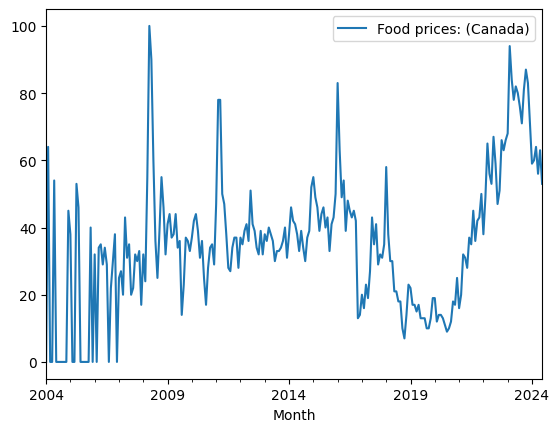

In [27]:
food_prices = pd.read_csv('../GT_food_prices_t.csv', index_col=0, skiprows=2)
food_prices.index = pd.to_datetime(food_prices.index)
#print(food_prices.to_string())
food_prices.plot()

<Axes: xlabel='Month'>

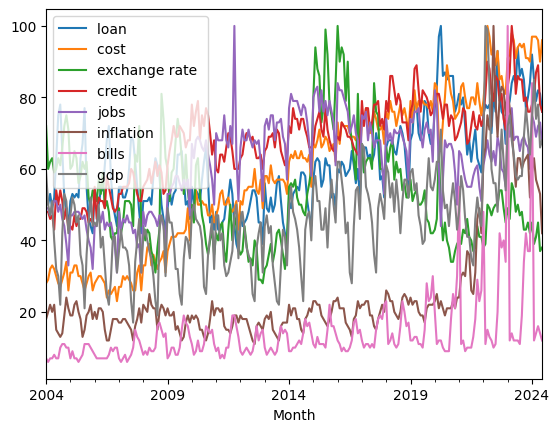

In [28]:
#concatenating GT data

file_list = [os.path.basename(x) for x in glob.glob('../GT_economic/'+'*.csv')] #

file_names = []
for i in range(len(file_list)):
    file_names.append(remove_und(file_list[i][:-4]))

dfs = {}

for j in range(len(file_list)):
    dfs[file_names[j]] = pd.read_csv('../GT_economic/'+file_list[j], header=0, index_col=0, skiprows=2)
    try: 
        pd.to_datetime(dfs[file_names[j]].index, format='%Y-%m')
    except Exception:
        print('File %s skipped due to alternate datetime formatting' % file_names[j])
        dfs.pop(file_names[j], None)
        j = j-1
    else:
        dfs[file_names[j]].index = pd.to_datetime(dfs[file_names[j]].index, format='%Y-%m')

file_names = list(dfs.keys())

GT = pd.concat(dfs.values(), axis=1)
GT.columns = [re.sub(r'\([^)]*\)', '', col) for col in GT.columns]
GT.columns = [re.sub(r':', '', col) for col in GT.columns]
#GT.to_csv('GT_economic.csv')
GT.plot()

Bank of Canada "Canadian Survey of Consumer Expectations"

In [29]:
csce = pd.read_csv(raw_path+'BC_csce.csv', index_col=0, skiprows=42)

#converting quarter dates
csce['Year'] = 'Year'
csce['Quarter'] = 'Quarter'
csce['Date'] = 'Date'

csce['Year'] = csce.index.str[:4]
csce['Quarter'] = csce.index.str[4:]

def convert_to_datetime(row):
    month = int(row['Quarter'][1]) * 3 - 2
    return pd.Timestamp(year=int(row['Year']), month=month, day=1)

csce['Date'] = csce.apply(convert_to_datetime, axis=1)

csce.set_index(csce['Date'], inplace=True)
csce.drop(columns=csce.columns[-3:], inplace=True)

csce = csce.apply(pd.to_numeric)

#csce.to_csv(processed_path+'BC_csce_processed.csv')
#csce


Google trends food grocery prices searches

In [33]:
#concatenating GT data

file_list = [os.path.basename(x) for x in glob.glob('../GT_grocery/'+'*.csv')] #

file_names = []
for i in range(len(file_list)):
    file_names.append(remove_und(file_list[i][:-4]))

dfs = {}

for j in range(len(file_list)):
    dfs[file_names[j]] = pd.read_csv('../GT_grocery/'+file_list[j], header=0, index_col=0, skiprows=2)
    try: 
        pd.to_datetime(dfs[file_names[j]].index, format='%Y-%m')
    except Exception:
        print('File %s skipped due to alternate datetime formatting' % file_names[j])
        dfs.pop(file_names[j], None)
        j = j-1
    else:
        dfs[file_names[j]].index = pd.to_datetime(dfs[file_names[j]].index, format='%Y-%m')

file_names = list(dfs.keys())

GT = pd.concat(dfs.values(), axis=1)
GT.columns = [re.sub(r'\([^)]*\)', '', col) for col in GT.columns]
GT.columns = [re.sub(r':', '', col) for col in GT.columns]
#GT.to_csv(processed_path+'GT_grocery_searches.csv')
GT

,grocery price,grocery prices,price of food,grocery,grocery cost,cost of food
Month,,,,,,
2004-01-01,0,0,0,18,0,0
2004-02-01,0,0,0,17,0,0
2004-03-01,0,0,0,15,0,0
2004-04-01,0,0,0,16,0,0
2004-05-01,100,0,0,16,0,0
...,...,...,...,...,...,...
2024-02-01,58,87,79,39,85,94
2024-03-01,64,76,70,41,89,92
2024-04-01,59,60,74,36,74,84


*Saving Cleaned CSVs*

In [10]:
"""food_expend.to_csv(clean_path+'food_expend_clean.csv')"""

NameError: name 'food_expend' is not defined